In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

2024-09-03 14:17:26.631378: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 14:17:26.631484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 14:17:26.769425: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
file_path = '/kaggle/input/feature/updated_subesco_feature.csv'

df = pd.read_csv(file_path)

df

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,Emotion_Label
0,0.296398,0.682716,0.689683,0.689385,0.672322,0.528108,0.470883,0.499283,0.528843,0.557049,...,0.076198,0.077292,0.074033,0.074662,0.079592,0.082505,0.071635,0.031172,0.002481,1
1,0.248283,0.706026,0.706815,0.708389,0.713562,0.684601,0.600470,0.607993,0.635487,0.640276,...,0.086291,0.087542,0.083476,0.083860,0.088415,0.093047,0.081644,0.042093,0.013261,1
2,0.295613,0.659459,0.689892,0.691345,0.715406,0.651697,0.502485,0.500438,0.535475,0.549964,...,0.039597,0.035752,0.033902,0.033378,0.037642,0.037569,0.031502,0.013868,0.001079,1
3,0.296356,0.684568,0.690559,0.691026,0.674871,0.531780,0.472932,0.501250,0.530463,0.557866,...,0.076198,0.077292,0.074033,0.074662,0.079592,0.082506,0.071635,0.031172,0.002481,1
4,0.276044,0.658115,0.711845,0.689098,0.599270,0.485283,0.493414,0.500981,0.529209,0.539147,...,0.082782,0.072167,0.077063,0.092752,0.081354,0.062160,0.046458,0.023496,0.001809,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.365498,0.636543,0.666523,0.729094,0.729776,0.547010,0.514500,0.529734,0.550691,0.617142,...,0.010464,0.013349,0.011641,0.011726,0.011667,0.009087,0.007969,0.005235,0.000458,6
27996,0.359860,0.647323,0.645763,0.696162,0.739154,0.606647,0.516042,0.522195,0.534187,0.588309,...,0.009125,0.007589,0.006962,0.008682,0.007670,0.006664,0.004085,0.002410,0.000175,6
27997,0.306845,0.717934,0.682322,0.697719,0.734929,0.763411,0.700274,0.661630,0.651532,0.692363,...,0.013913,0.012336,0.011825,0.013584,0.012734,0.011931,0.009257,0.007713,0.005305,6
27998,0.343491,0.656704,0.631289,0.664526,0.719001,0.655085,0.527817,0.516113,0.518059,0.548224,...,0.004828,0.003775,0.003440,0.004133,0.003512,0.003098,0.002158,0.001150,0.000080,6


In [3]:
X = df.iloc[: ,:-1].values
Y = df['Emotion_Label'].values

In [4]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [5]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=0.85, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23800, 163), (23800, 7), (4200, 163), (4200, 7))

In [6]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23800, 163), (23800, 7), (4200, 163), (4200, 7))

In [7]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23800, 163, 1), (23800, 7), (4200, 163, 1), (4200, 7))

In [ ]:
# Model details are not shared because of IPR

In [9]:
# Train the model
history=model.fit(x_train, y_train, batch_size=64, epochs=400, validation_data=(x_test, y_test), callbacks=[rlrp, checkpointer])

Epoch 1/400
  2/372 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.1953 - loss: 3.7182   

I0000 00:00:1725373081.849713     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725373081.880084     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3195 - loss: 2.8926

W0000 00:00:1725373111.689918     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1725373113.153851     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 4.63546, saving model to saved_models/audio_classification.keras


W0000 00:00:1725373115.961991     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


372/372 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - accuracy: 0.3197 - loss: 2.8912 - val_accuracy: 0.2357 - val_loss: 4.6355 - learning_rate: 0.0010
Epoch 2/400
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6014 - loss: 1.7131
Epoch 2: val_loss improved from 4.63546 to 1.52357, saving model to saved_models/audio_classification.keras
372/372 ━━━━━━━━━━━━━━━━━━━━ 46s 43ms/step - accuracy: 0.6015 - loss: 1.7128 - val_accuracy: 0.6817 - val_loss: 1.5236 - learning_rate: 0.0010
Epoch 3/400
371/372 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7364 - loss: 1.3639
Epoch 3: val_loss improved from 1.52357 to 1.30808, saving model to saved_models/audio_classification.keras
372/372 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.7364 - loss: 1.3638 - val_accuracy: 0.7469 - val_loss: 1.3081 - learning_rate: 0.0010
Epoch 4/400
371/372 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8109 - loss: 1.1724
Epoch 4: val_loss improved from 1.30808 to 1.25165, saving model to saved_models/audio_clas

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9932 - loss: 0.1049
Accuracy of our model on test data :  99.38095211982727 %


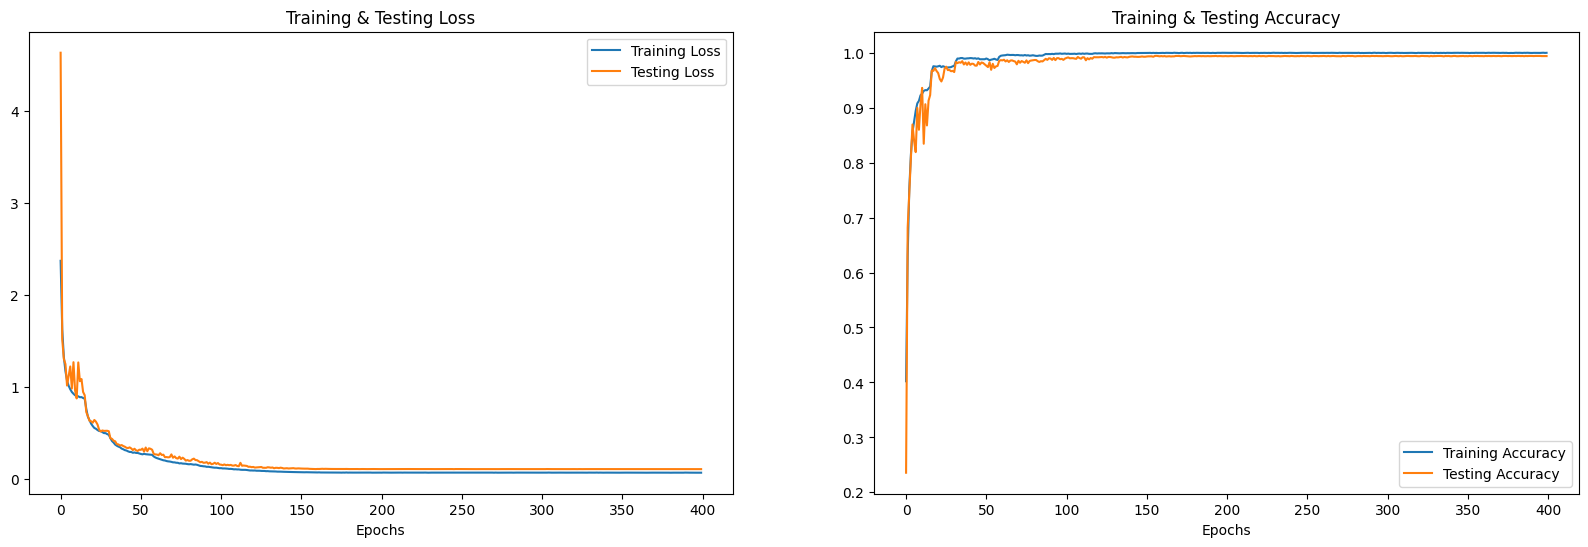

In [11]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(400)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [12]:
params = pd.DataFrame(train_acc, columns=['Training Accuracy'])
params['Training Loss'] = train_loss
params['test_acc'] = test_acc
params['test_loss'] = test_loss
params

,Training Accuracy,Training Loss,test_acc,test_loss
0,0.402143,2.373902,0.235714,4.635459
1,0.630588,1.631104,0.681667,1.523575
2,0.751933,1.329233,0.746905,1.308080
3,0.814370,1.175429,0.808333,1.251646
4,0.855672,1.072631,0.869286,1.018360
...,...,...,...,...
395,0.999580,0.071244,0.994048,0.109471
396,0.999832,0.070953,0.993810,0.109755
397,0.999916,0.070789,0.993810,0.109678
398,0.999580,0.070997,0.993810,0.109979


In [13]:
params.to_csv('Parameters.csv', index=False)

In [14]:
test_acc

[0.23571428656578064,
 0.6816666722297668,
 0.7469047904014587,
 0.8083333373069763,
 0.8692857027053833,
 0.8395237922668457,
 0.8190476298332214,
 0.8995237946510315,
 0.8597618937492371,
 0.9061904549598694,
 0.935952365398407,
 0.8342857360839844,
 0.9061904549598694,
 0.8676190376281738,
 0.9126190543174744,
 0.9228571653366089,
 0.9676190614700317,
 0.9669047594070435,
 0.9719047546386719,
 0.9666666388511658,
 0.9628571271896362,
 0.9521428346633911,
 0.9476190209388733,
 0.9547619223594666,
 0.9709523916244507,
 0.9745237827301025,
 0.9683333039283752,
 0.9685714244842529,
 0.9661904573440552,
 0.9669047594070435,
 0.9647619128227234,
 0.9830952286720276,
 0.9809523820877075,
 0.982619047164917,
 0.9816666841506958,
 0.9845238327980042,
 0.9785714149475098,
 0.9821428656578064,
 0.9778571724891663,
 0.9823809266090393,
 0.9778571724891663,
 0.9800000190734863,
 0.9795238375663757,
 0.9764285683631897,
 0.9764285683631897,
 0.9830952286720276,
 0.9785714149475098,
 0.98214286565

In [15]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

 19/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step  

W0000 00:00:1725379648.133626     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


W0000 00:00:1725379649.624370     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [16]:
y_pred

array([[1],
       [4],
       [4],
       ...,
       [4],
       [3],
       [1]])

In [17]:
pred_test

array([[1.00000000e+00, 1.17105481e-09, 9.73952906e-13, ...,
        2.48648385e-15, 1.01956055e-10, 1.49298990e-13],
       [4.10069602e-13, 1.09147785e-14, 1.41774596e-14, ...,
        7.64125447e-15, 1.64932445e-12, 3.98993049e-15],
       [1.20890216e-11, 8.24651285e-12, 3.63949322e-13, ...,
        7.63832227e-12, 4.54637196e-12, 2.13873058e-14],
       ...,
       [2.69522061e-11, 3.92506584e-13, 1.84221430e-10, ...,
        2.05798615e-14, 1.00090786e-16, 4.37569428e-14],
       [2.56603894e-08, 2.52200973e-12, 1.00000000e+00, ...,
        3.46769401e-12, 1.30798141e-17, 3.71378622e-11],
       [1.00000000e+00, 5.14954572e-11, 5.76439452e-10, ...,
        2.04868095e-10, 1.23177565e-10, 2.55649057e-10]], dtype=float32)

In [18]:
prediction = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
prediction['Predicted Labels'] = y_pred.flatten()
prediction['Actual Labels'] = y_test.flatten()

prediction.head(10)

,Predicted Labels,Actual Labels
0,1,1
1,4,4
2,4,4
3,3,3
4,5,5
5,1,1
6,3,3
7,3,3
8,5,5
9,2,2


In [19]:
prediction

,Predicted Labels,Actual Labels
0,1,1
1,4,4
2,4,4
3,3,3
4,5,5
...,...,...
4195,1,1
4196,4,4
4197,4,4
4198,3,3


In [20]:
with pd.ExcelWriter('Pred.xlsx', engine='openpyxl') as writer:
    prediction.to_excel(writer, sheet_name="prediction", index=False)

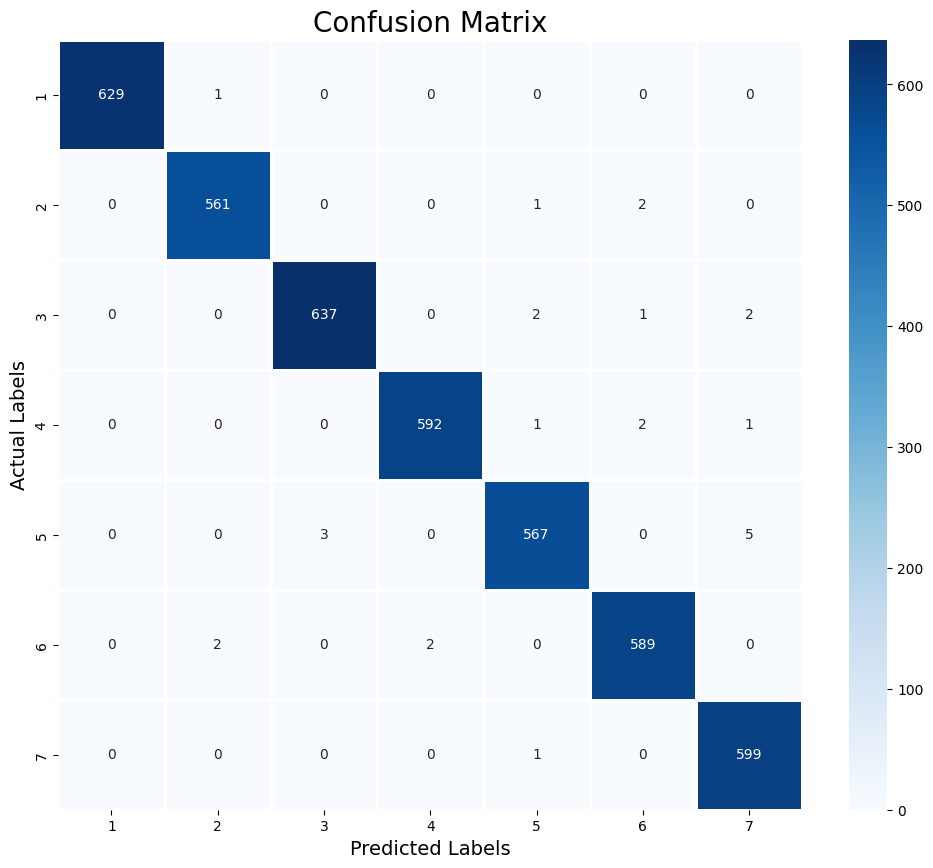

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [22]:
cm.to_csv('Confusion_matrix.csv')

In [23]:
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       630
           2       0.99      0.99      0.99       564
           3       1.00      0.99      0.99       642
           4       1.00      0.99      0.99       596
           5       0.99      0.99      0.99       575
           6       0.99      0.99      0.99       593
           7       0.99      1.00      0.99       600

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [24]:
with open('report.csv', 'w') as file:
    file.write(report)

In [25]:
# Save the Keras model
model.save('saved_models/audio_classification_final.hdf5')

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Save the converted model
with open('saved_models/audio_classification_final.tflite', 'wb') as f:
    f.write(tflite_model)